<a href="https://colab.research.google.com/github/cesaroliveiragoes/Machine-Learning-Data-Science-Classes/blob/main/Machine_Learning_and_Data_Science_Exs_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
import missingno as msno

In [ ]:
!pip install missingno


In [ ]:
# Carregamento dos arquivos
url = 'https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv'
dados_pbi = pd.read_csv(url)
dados_pbi

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,144.42,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49


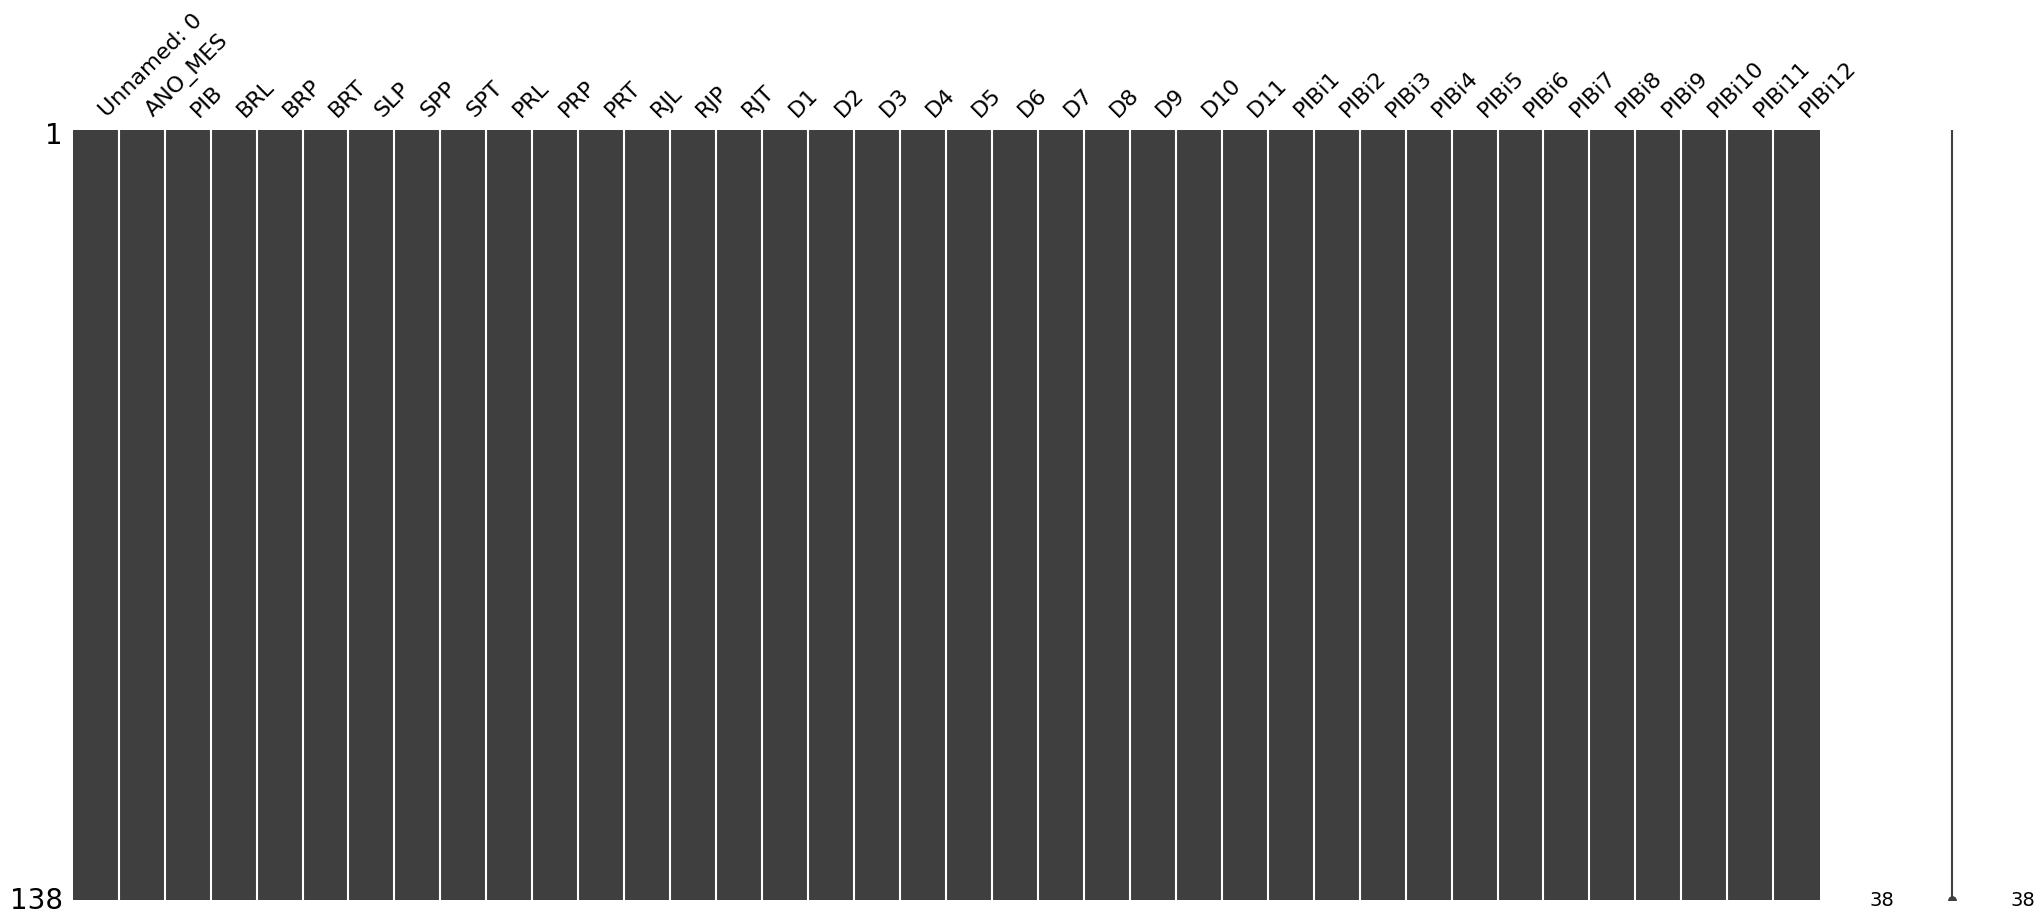

In [ ]:
#Verificando se existem dados ausentes
msno.matrix(dados_pbi)
plt.show()

In [ ]:
# Calculando o desvio padrão
desvio_padrao = dados_pbi['PIB'].rolling(window=12).std()
desvio_padrao

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
133    3.318853
134    3.317188
135    3.592164
136    3.528810
137    3.639948
Name: PIB, Length: 138, dtype: float64

In [ ]:
#Definindo a mediana:

mediana = dados_pbi['PIB'].rolling(window=12).median()
mediana

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
133    151.45
134    151.57
135    151.57
136    151.08
137    151.08
Name: PIB, Length: 138, dtype: float64

# Questão 1: Avaliar se há 1 valor para PIB para cada unidade de tempo

In [ ]:
# Verificando  as colunas presentes no DataFrame
print(dados_pbi.columns)


Index(['Unnamed: 0', 'ANO_MES', 'PIB', 'BRL', 'BRP', 'BRT', 'SLP', 'SPP',
       'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'PIBi1', 'PIBi2', 'PIBi3',
       'PIBi4', 'PIBi5', 'PIBi6', 'PIBi7', 'PIBi8', 'PIBi9', 'PIBi10',
       'PIBi11', 'PIBi12'],
      dtype='object')


In [ ]:
#A coluna que possui data é a ano_mes

In [ ]:
if dados_pbi['ANO_MES'].nunique() == len(dados_pbi):
    print("Há 1 valor para PIB para cada unidade de tempo.")
else:
    print("Há mais de 1 valor para PIB para alguma unidade de tempo.")

# A nunique() é utilizada para contar o número de valores únicos em uma série ou coluna de um DataFrame, assim retornando a contagem dos diferentes valores distintos presentes na série.
# doc: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Há 1 valor para PIB para cada unidade de tempo.


In [ ]:
#Não há repetição entre os dados

# Questão 2: Analisar se há sazonalidades na série do PIB

In [ ]:
# Converter a coluna ANO_MES para o formato de data
dados_pbi['ANO_MES'] = pd.to_datetime(dados_pbi['ANO_MES'], format='%b/%y', errors='coerce')
dados_pbi

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,Ano,Mes
0,1,2004-01-01,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,2004,1
1,2,NaT,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,<NA>,<NA>
2,3,2004-03-01,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,2004,3
3,4,NaT,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,<NA>,<NA>
4,5,NaT,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,NaT,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,<NA>,<NA>
134,135,2015-03-01,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,2015,3
135,136,NaT,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,<NA>,<NA>
136,137,NaT,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,<NA>,<NA>


In [ ]:
# Extrair o ano e o mês para colunas separadas
dados_pbi['Ano'] = dados_pbi['ANO_MES'].dt.year.astype(float).astype(pd.Int64Dtype())  # Converter para inteiro
dados_pbi['Mes'] = dados_pbi['ANO_MES'].dt.month.astype(float).astype(pd.Int64Dtype())  # Converter para inteiro
dados_pbi

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,Ano,Mes
0,1,2004-01-01,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,2004,1
1,2,NaT,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,<NA>,<NA>
2,3,2004-03-01,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,2004,3
3,4,NaT,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,<NA>,<NA>
4,5,NaT,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,NaT,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,<NA>,<NA>
134,135,2015-03-01,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,2015,3
135,136,NaT,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,<NA>,<NA>
136,137,NaT,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,<NA>,<NA>


In [ ]:
# Calcular a média anual do PIB
media_anual = dados_pbi.groupby('Ano')['PIB'].mean()
media_anual

Ano
2004    108.780
2005    112.196
2006    116.728
2007    123.522
2008    130.176
2009    129.022
2010    139.682
2011    144.190
2012    147.214
2013    151.554
2014    151.518
2015    149.520
Name: PIB, dtype: float64

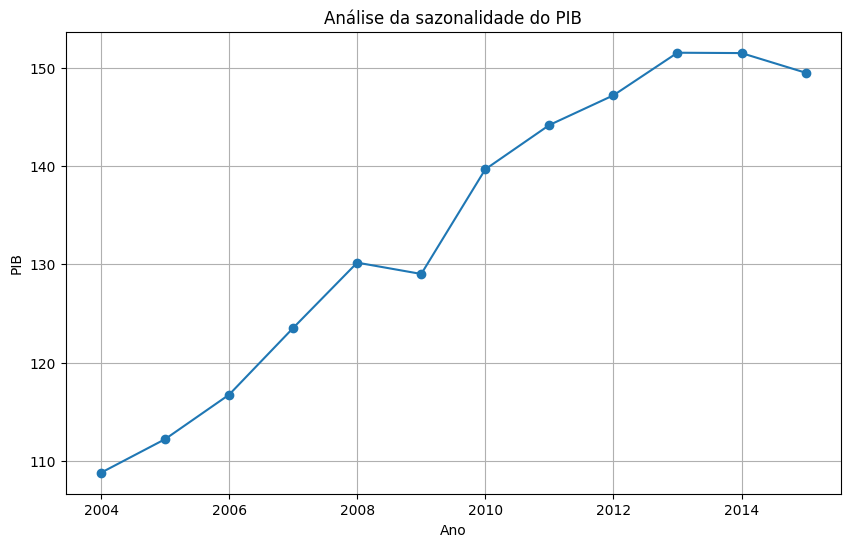

In [ ]:
#análise da sazonalidade do PIB
plt.figure(figsize=(10, 6))
plt.plot(media_anual.index, media_anual.values, marker='o', linestyle='-')
plt.title('Análise da sazonalidade do PIB')
plt.xlabel('Ano')
plt.ylabel('PIB')
plt.grid(True)
plt.show()

In [ ]:
#Percebe que a sazonalidade aumenta conforme os anos, sendo que entre os anos de  2012 a 2015 foi maior.

#3 Analisar se há uma tendência/ruído
a. Dica: opcional, pode ser utilizada alguma função/pacote de
decomposição de série temporal

In [ ]:
# Calculando a média com janela de 12 meses
media_pib = dados_pbi['PIB'].rolling(window=12).mean()
media_pib

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
133    151.803333
134    151.823333
135    151.499167
136    151.036667
137    150.907500
Name: PIB, Length: 138, dtype: float64

In [ ]:
# Calculando o ruído subtraindo a média_pbi
ruido = dados_pbi['PIB'] - media_pib
ruido

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
133   -7.383333
134   -0.143333
135   -4.469167
136   -2.096667
137   -3.537500
Name: PIB, Length: 138, dtype: float64

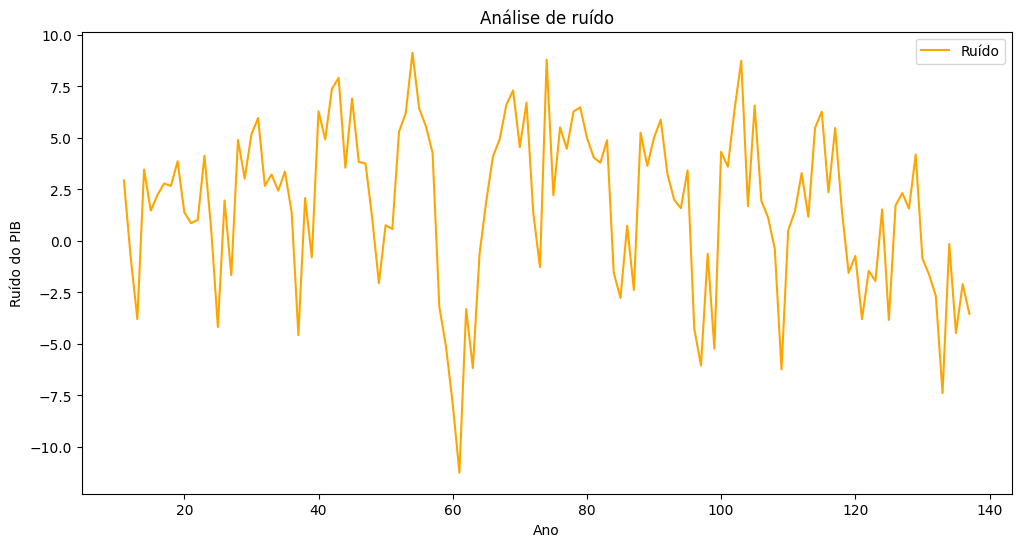

In [ ]:
# Gráfico do ruído
plt.figure(figsize=(12, 6))
plt.plot(ruido, label='Ruído', color='orange')  # Apenas o ruído
plt.legend()
plt.title('Análise de ruído')
plt.xlabel('Ano')
plt.ylabel('Ruído do PIB')  # Atualizado para refletir que é o ruído do PIB
plt.show()


#4. Análise de correlação entre a variável PIB e as 12 variáveis de tráfego

In [ ]:
# as 12 + PIB colunas de variáveis de trágego são 'PIB','BRL','BRP','BRT', 'SLP', 'SPP', 'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT', ou seja, removendo ruídos deixando apenas as variáveis de trânsito

correlacao = dados_pbi[['PIB','BRL','BRP','BRT', 'SLP', 'SPP', 'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT']]
correlacao.reset_index(drop=True, inplace=True)

correlacao

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT
0,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,117.49,115.15,98.66,112.59
1,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,97.55,102.40,90.20,100.51
2,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,96.27,105.88,107.36,106.11
3,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,117.25,100.96,105.64,99.25,104.65
4,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,117.08,97.02,106.74,102.29,106.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,115.10,141.47,132.48,115.71,129.70
134,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,153.95,149.51,141.81,135.50,140.47
135,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,136.55,152.55,138.93,122.07,135.90
136,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,141.91,146.34,141.03,125.93,138.27


# 5. Incluir uma visualização gráfica da matriz de correlação entre PIB e as variáveis de tráfego

In [ ]:
import numpy as np

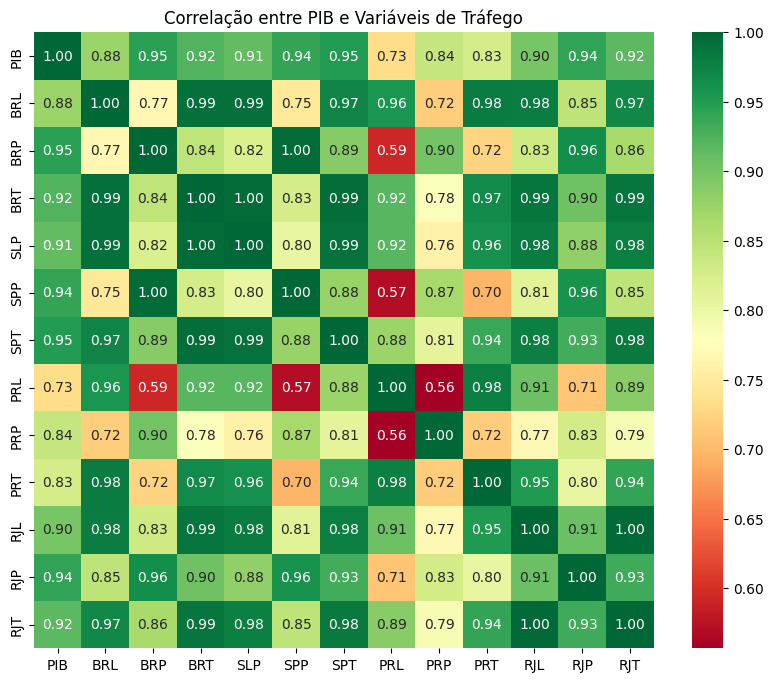

In [ ]:
correlacao = dados_pbi[['PIB','BRL','BRP','BRT', 'SLP', 'SPP', 'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT']]
correlacao_matriz = correlacao.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlacao_matriz, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlação entre PIB e Variáveis de Tráfego')
plt.show()

In [ ]:
# Isso indica que as variáveis estão correlacionadas positivamente umas com as outras, podendo indica que, à medida que uma variável aumenta, a outra também tende a aumentar nas variváveis de trafego.